In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pylab
from pylab import legend, plot, show, title, xlabel, ylabel
import seaborn as sns
from numpy import random
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import os
import scipy 
from scipy import stats
from scipy.stats import binom
from scipy.stats import poisson, norm, t
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels import discrete
from statsmodels.discrete import discrete_model
from statsmodels.discrete.discrete_model import MNLogit #multi nominal
from statsmodels.miscmodels.ordinal_model import OrderedModel #multi nominal

import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import Poisson as psn

from statsmodels.discrete.discrete_model import NegativeBinomial as ngb
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

# Step 1: Reading and Understanding the dataset

In [86]:
df = pd.read_csv(r'day.csv')

In [87]:
df.shape

(730, 16)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [89]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- From this we can say that there are no null values in the dataset

In [90]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


# Step 2: Visualizing the dataset

- Visualizing the categorical variables

    - As per the dataset there are season, yr, mnth, holiday, weekday, workingday, weathersit this are the categorical data variables so we can plot the boxplot for this variables.

C:\Users\vinay\AppData\Local\Temp\ipykernel_3892\3278508490.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season',y='cnt',data=df, palette='Set2')
C:\Users\vinay\AppData\Local\Temp\ipykernel_3892\3278508490.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='yr',y='cnt',data=df, palette='Pastel1')
C:\Users\vinay\AppData\Local\Temp\ipykernel_3892\3278508490.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mnth',y='cnt',data=df, palette='Blues')
C:\Users\vinay\AppData\Local\Temp\ipykernel_3892\3278508490.py:9: FutureWarning: 

<Axes: xlabel='weathersit', ylabel='cnt'>

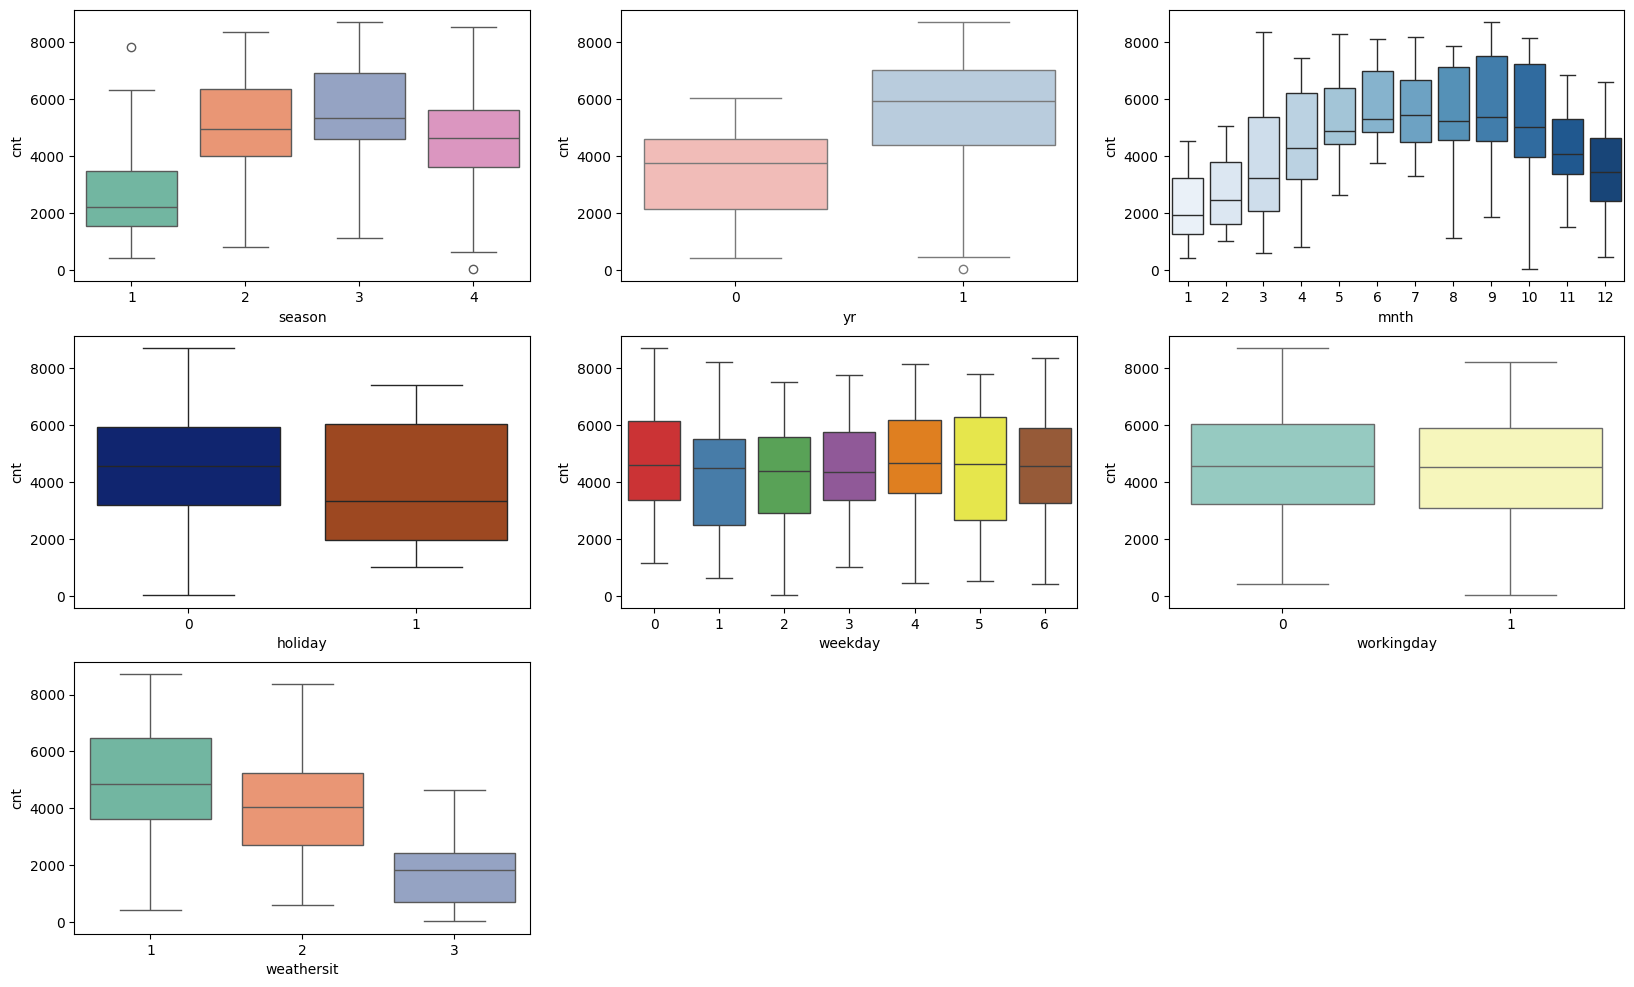

In [91]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)                            #subplot is used for plotting multiple plot inside one figure plt.subplot(no.of rows, no.of columns, no. of index)
sns.boxplot(x='season',y='cnt',data=df, palette='Set2')
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=df, palette='Pastel1')
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=df, palette='Blues')
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=df, palette='dark')
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=df, palette='Set1')
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=df, palette='Set3')
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=df, palette='Set2')

### from above box plot we can say that there are no outlier values are there in this multiple variables

- Visualizing the continuous variables
    - As per the dataset there are temp, atemp, hum, windspeed, casual, registered this are the continuous data variables so we can plot the Histogram  for this variables.

<Axes: xlabel='registered', ylabel='Count'>

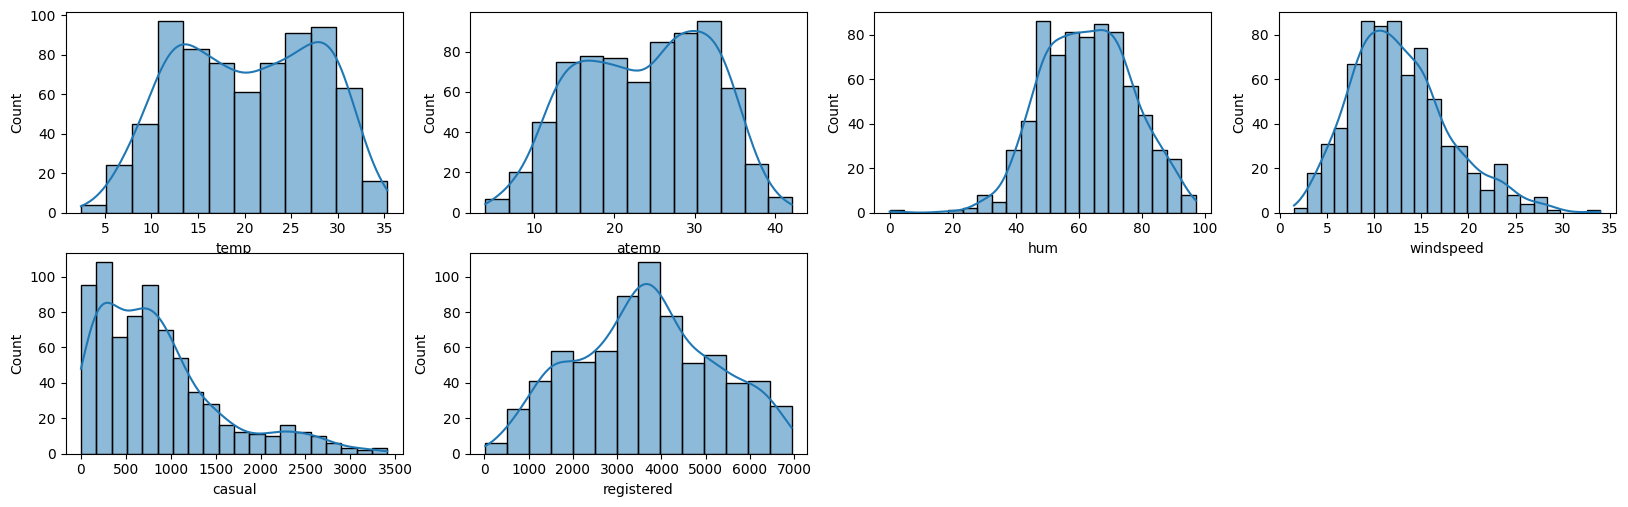

In [92]:
plt.figure(figsize=(20,12))
plt.subplot(4,4,1)
sns.histplot(df['temp'],kde=True)
plt.subplot(4,4,2)
sns.histplot(df['atemp'],kde=True)
plt.subplot(4,4,3)
sns.histplot(df['hum'],kde=True)
plt.subplot(4,4,4)
sns.histplot(df['windspeed'],kde=True)
plt.subplot(4,4,5)
sns.histplot(df['casual'],kde=True)
plt.subplot(4,4,6)
sns.histplot(df['registered'],kde=True)


- From above Histogram's we can say that there are for variables temp, atemp, registered columns are occuring under normal distribution because the KDE (Kernel Density Function) shows us the understanding of distribution of data and after that we can say that the variables are normally distributed as this variables shows Bell Shaped Curve.

- For the remaining variables occuring under distribution like,

    - Hum - Left Skewed Distribution -- where most of the data is on Right Side
    - Windspeed - Right Skewed Distribution -- where most of the data is on Left Side
    - Casual - Right Skewed Distribution -- where most of the data is on Left Side

# Step 3: Data Preparation

### Dropping unnecessary columns like - instant, dteday

In [93]:
df = df.drop(['instant','dteday'],axis=1)

In [94]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


### Dummy Variables 

#### We are making dummy variables of those columns which are contains an categorical data

- making dummy columns for season, mnth, weekday, weathersit

because this variables has multiple levels.

#### 1. For season variable there are,

            1 will respond to spring

            2 will respond to summer

            3 will respond to fall

            4 will respond to winter

In [95]:
spring_dumm = pd.get_dummies(df.season, drop_first=True).astype(int)

In [96]:
spring_dumm[2].unique()

array([0, 1])

In [97]:
spring_dumm = spring_dumm.rename(columns = {1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [98]:
spring_dumm

,Summer,Fall,Winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
725,0,0,0
726,0,0,0
727,0,0,0
728,0,0,0


In [99]:
df = df.drop('season',axis=1)

In [100]:
df = pd.concat([df, spring_dumm],axis=1)

In [101]:
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Summer,Fall,Winter
0,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0
1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0
2,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
3,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
4,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0


In [102]:
np.where(spring_dumm['Summer']==1)                          # here i'm just checking is there are summer is occuring in the dataset or not

(array([ 79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455,
        456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
        469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481,
        482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494,
        495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507,
        508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520,
        521, 522, 523, 524, 525, 526, 527, 528, 529

- Now here, Spring will be automatically pickuped as a reference event 

### 2. for mnth variable there are,

        1....12 respond for January.....December respectively
    

In [103]:
month_dumm = pd.get_dummies(df.mnth, drop_first=True).astype(int)

In [104]:
month_dumm.head()

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [105]:
month_dumm = month_dumm.rename(columns={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [106]:
df = df.drop('mnth',axis=1)

In [107]:
df = pd.concat([df,month_dumm],axis=1)

In [108]:
df.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,...,March,April,May,June,July,August,September,October,November,December
0,0,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,0,0,0,0
2,0,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,0,0,0
3,0,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,0,0,0,0
4,0,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,0,0,0


- Now here, January will be also automatically pickuped as a reference event 

### 3. for Weekday variable there are,
    1...6 respond to Sunday....Saturday

In [109]:
df['weekday'].unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

In [110]:
week_dumm = pd.get_dummies(df.weekday, drop_first=True).astype(int)

In [111]:
week_dumm.head()

,1,2,3,4,5,6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0


In [112]:
week_dumm = week_dumm.rename(columns = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

In [113]:
df = df.drop('weekday',axis=1)

In [114]:
df = pd.concat([df,week_dumm],axis=1)

In [115]:
df.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,September,October,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,0,0,1,2,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,2,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,1,0


- Now here, Sunday will be also automatically pickuped as a reference event 

### 4. for weathersit there are,
    1 would be respond for Clear, Few clouds, Partly cloudy, Partly cloudy
    2 would be respond for Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3 would be respond for Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

In [116]:
df['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [117]:
weathersit_dumm = pd.get_dummies(df.weathersit,drop_first=True).astype(int)

In [118]:
weathersit_dumm.head()

,2,3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [119]:
weathersit_dumm = weathersit_dumm.rename(columns = {1:'Clear',2:'Mist',3:'Light Snow'})

In [120]:
weathersit_dumm

,Mist,Light Snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


In [121]:
df = df.drop('weathersit',axis=1)

In [122]:
df = pd.concat([df,weathersit_dumm],axis=1)

In [123]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,November,December,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Mist,Light Snow
0,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,1,0,0,0


In [69]:
new_df = df[['temp','atemp','hum','windspeed','casual','registered','cnt']]

<Axes: >

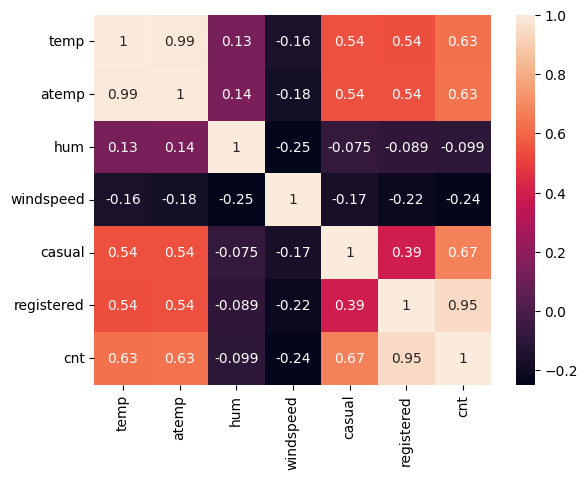

In [70]:
sns.heatmap(new_df.corr(),annot=True)

In [71]:
x = df.drop('cnt',axis=1).astype(int)

In [72]:
y = df.cnt

In [73]:
res = SelectKBest(k=4).fit(x,y)
d1 = {'Factors':x.columns,'Scores':res.scores_}
NewRes = pd.DataFrame(d1).sort_values(by='Scores',ascending=False)

In [74]:
NewRes

,Factors,Scores
9,registered,8.257343
13,February,5.164680
27,Thursday,1.748660
8,casual,1.558906
0,yr,1.483549
4,temp,1.422790
5,atemp,1.407235
23,December,1.380186
14,March,1.380186
15,April,1.338182
